In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [3]:
data = pd.read_csv("insurance.csv")     # Importing training dataset using pd.read_csv

In [4]:
data

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Text(0.5, 1.0, 'Correlation between features')

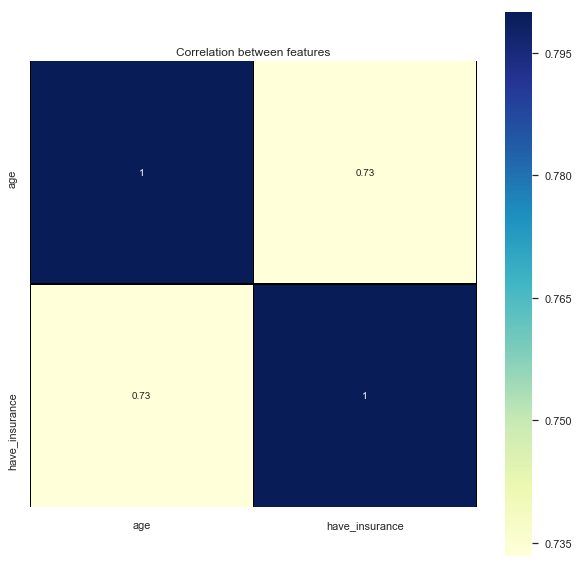

In [5]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

No EDA i am doing as data is very less

In [10]:
data.rename(columns = {"have_insurance": "haveinsurance"},
                                 inplace = True) 

In [11]:
data

,age,haveinsurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


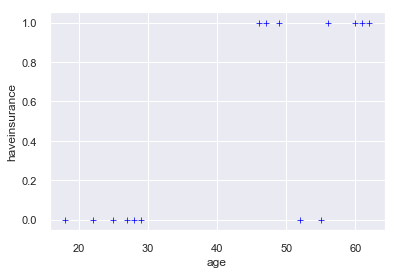

In [44]:
sns.scatterplot(data.age,data.haveinsurance,marker="+",color="blue")

4.4 Preparing X and y using pandas

In [12]:
X = data.loc[:,data.columns != 'haveinsurance']
X.head()

,age
0,22
1,25
2,47
3,52
4,46


In [15]:
y=data.haveinsurance
y.head()

0    0
1    0
2    1
3    0
4    1
Name: haveinsurance, dtype: int64

4.5 Splitting X and y into training and test datasets.¶

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [19]:
print(X_train.shape)
print(y_train.shape)

(12, 1)
(12,)


print(X_test.shape)
print(y_test.shape)

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

E:\AnacondaInstall\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Using the Model for Prediction

In [22]:
y_pred_train = logreg.predict(X_train)  

In [23]:
y_pred_test = logreg.predict(X_test) 

Model evaluation

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.3333333333333333


The above accuracy score is not satisfactory.So taking different test and training set.

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.70, test_size=0.30, random_state=0)

In [89]:
print(X_train.shape)
print(y_train.shape)

(10, 1)
(10,)


In [90]:
print(X_test.shape)
print(y_test.shape)

(5, 1)
(5,)


In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

E:\AnacondaInstall\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
y_pred_train = logreg.predict(X_train)  

In [93]:
y_pred_test = logreg.predict(X_test) 

In [94]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8


In [95]:
X_test

,age
1,25
6,55
8,62
9,61
14,49


In [96]:
logreg.predict(X_test)

array([0, 1, 1, 1, 1], dtype=int64)

In [98]:
logreg.predict_proba(X_test)

array([[0.5877516 , 0.4122484 ],
       [0.38137058, 0.61862942],
       [0.33640313, 0.66359687],
       [0.34267017, 0.65732983],
       [0.42163815, 0.57836185]])

for age 25 the probability of not buying insurance is 0.5877516(58%) and  buying is 0.4122484(41%)
for age 55 the probability of not buying insurance is 0.38137058(38%) and buying is 0.61862942(61%) and so on...

In [102]:
logreg.predict([[25]]) #for 25 age array[0] so not going to buy insurance

array([0], dtype=int64)

In [103]:
logreg.predict([[47]])#for 25 age array[1] so  going to buy insurance

array([1], dtype=int64)

Adjusting threshold

In [104]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.4


score has been decreased

In [105]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.6


previous score where we calculated was more